In [48]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/datc/opschaler/combined_dfs_gas_smart_weather/P01S01W0373.csv',header=0,delimiter='\t')


In [49]:
df['Q'].replace(" ","")
df['T'].replace(" ","")
df['gasPower'].replace(" ","")

GP = df['gasPower']
Q = df['Q']
T = df['T']


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# X and Y Values
X = df[['T','Q']]
Y = GP

regr = LinearRegression()#Create an object of type LinearRegression()
regr.fit(X,Y)#Fit the data for the 3 variables

print('Intercept: \n', regr.intercept_)#The intercept is the expected mean value of Y when all X=0
print('Coefficients: \n', regr.coef_)#Coefficients of the equation that fit the data

#Code that displays a table with statistical info
X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Intercept: 
 0.00200940641255
Coefficients: 
 [ -1.17297432e-04   4.03895475e-07]
                            OLS Regression Results                            
Dep. Variable:               gasPower   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     5852.
Date:                Fri, 21 Sep 2018   Prob (F-statistic):               0.00
Time:                        10:51:24   Log-Likelihood:             9.8755e+05
No. Observations:              193837   AIC:                        -1.975e+06
Df Residuals:                  193834   BIC:                        -1.975e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

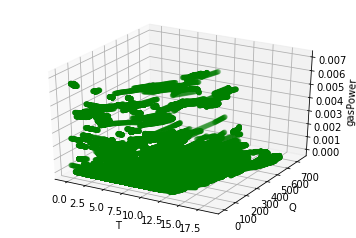

In [69]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt



fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('T')
ax.set_ylabel('Q')
ax.set_zlabel('gasPower')


ax.scatter3D(T, Q, GP, c='green', cmap='Greens', alpha=0.1);

